# Importing Packages

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings

In [72]:
plt.style.use('classic')
sns.set(style="whitegrid")

# EDA

In [73]:
df = pd.read_csv('bank-additional-full_final.csv', encoding="utf-8", delimiter=";")
pd.set_option('display.max_columns',None)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,239.0,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,239.0,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,239.0,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41195.0,40.030319,10.431818,17.000,32.000,38.000,47.000,98.000
duration,41196.0,258.281265,259.254211,0.000,102.000,180.000,319.000,4918.000
campaign,41196.0,2.567676,2.769751,1.000,1.000,2.000,3.000,56.000
pdays,41196.0,962.482547,186.893451,0.000,999.000,999.000,999.000,999.000
previous,41196.0,0.173124,0.494987,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41196.0,0.081656,1.570894,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41195.0,93.575867,0.578999,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41196.0,-40.504600,4.629972,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41196.0,3.620787,1.734655,0.634,1.344,4.857,4.961,5.045
nr.employed,41196.0,5166.996405,72.300104,4963.600,5099.100,5191.000,5228.100,5228.100


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

### Unique Values in all columns

In [77]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

age
[56. 57. 37. 40. 45. 59. 41. 24. 25. 29. 35. 54. 46. 50. 39. 30. 55. 49.
 34. 52. 58. 32. 38. 44. 42. 60. 53. 47. 51. 48. 33. 31. 43. 36. 28. 27.
 26. 22. 23. 20. 21. 61. 19. 18. 70. 66. 76. 67. 73. 88. 95. 77. 68. 75.
 63. 80. 62. 65. 72. 82. 64. 71. 69. 78. 85. 79. 83. 81. 74. 17. 87. 91.
 86. 98. 94. 84. 92. 89. nan]
------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student' nan]
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown' nan]
------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate' nan]
------------------------------------------------------------
default
['no' 'unknown' 'yes' nan]
------------------------------------------------------

In [78]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
category_cols = list(df.select_dtypes(include=['object']))

### Bar Plot of categorical columns

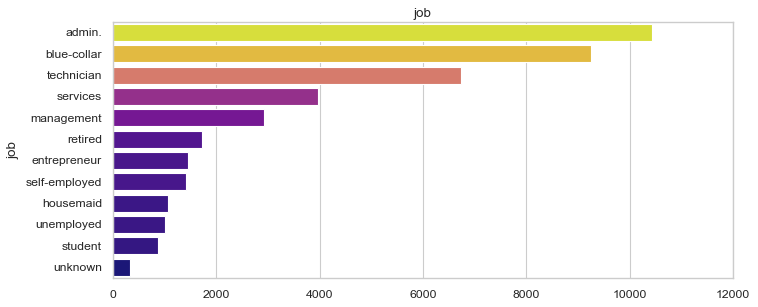

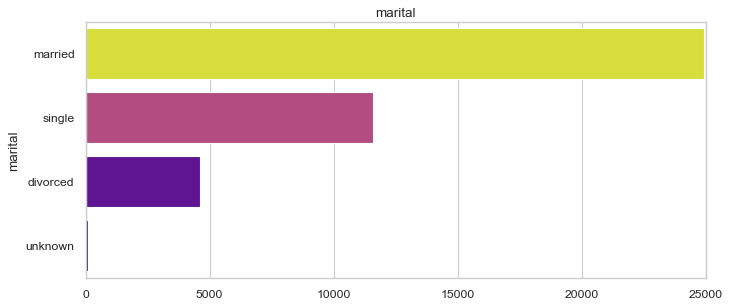

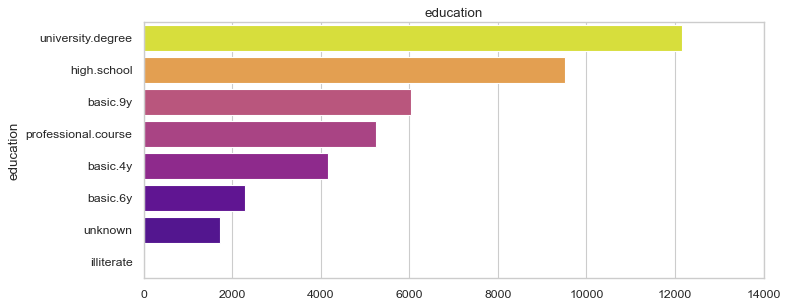

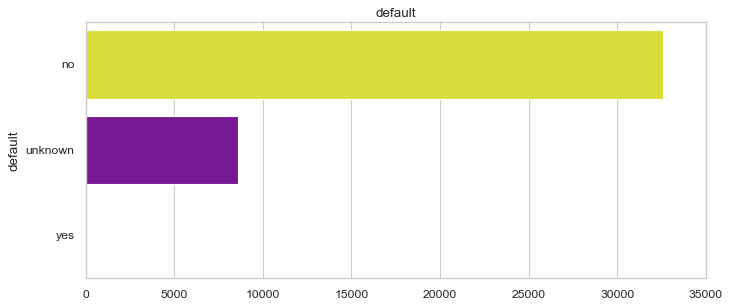

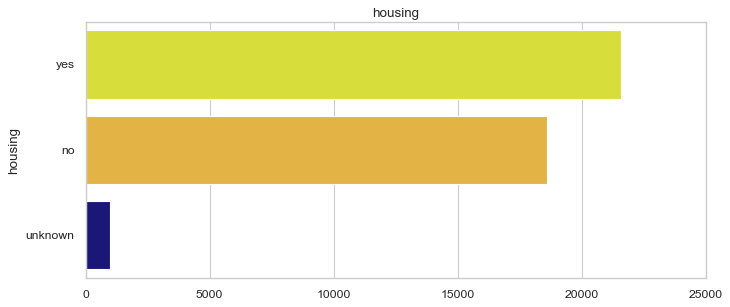

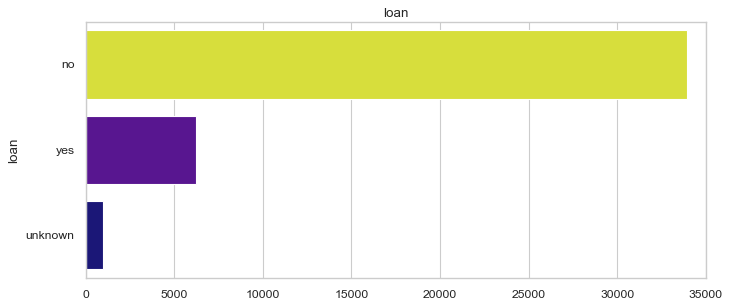

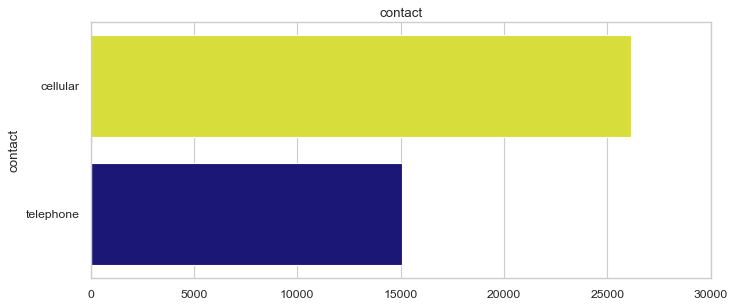

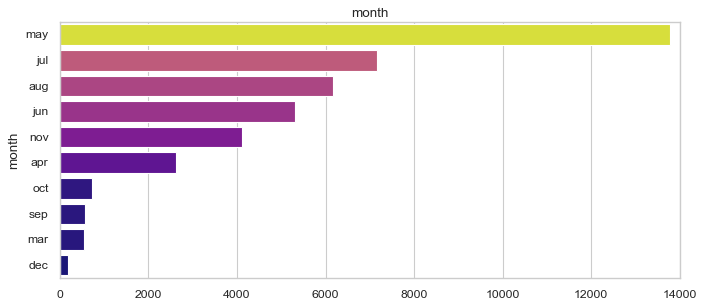

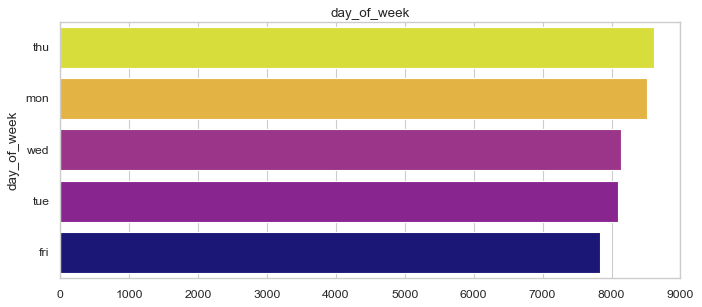

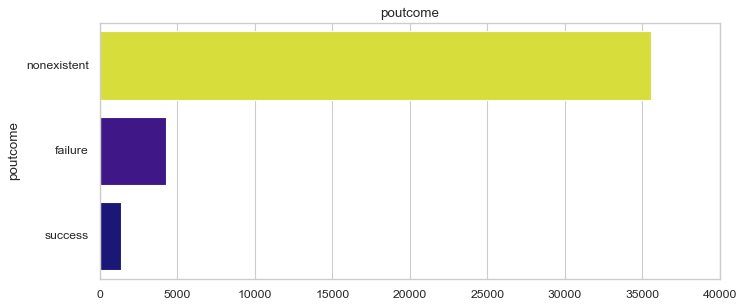

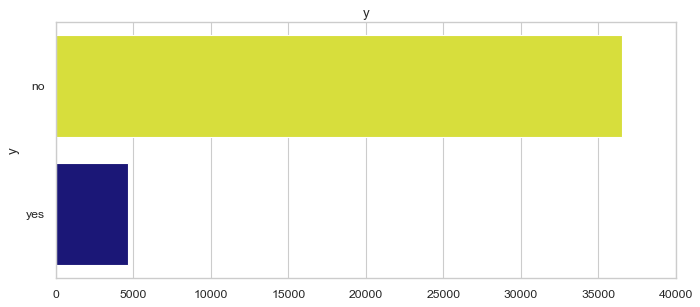

In [79]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index, hue=df[col].value_counts().values, palette='plasma', legend=None)
    plt.title(col)
    plt.show()

# Data Preprocessing

### Data Imputation

In [80]:
# Count the total number of rows where 'unknown' is present in the specified columns
total_unknown_rows = df[df.apply(lambda x: 'unknown' in x.values, axis=1)].shape[0]
print(f'Total number of rows with "unknown" values in specified columns: {total_unknown_rows}')

Total number of rows with "unknown" values in specified columns: 10700


In [81]:
unknown_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in unknown_columns:
    print("*"*10, col, "*"*10)
    print(df[col].value_counts())

********** job **********
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
********** marital **********
marital
married     24934
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
********** education **********
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5249
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
********** default **********
default
no         32595
unknown     8597
yes            3
Name: count, dtype: int64
********** housing **********
housing
yes        21584
no         18622
unknown      990
Name: count, dtype: int64
**

In [82]:
# remove unknown from column 'job'
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']== 'unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
df['job'].replace('unknown', np.nan, inplace=True)

# remove unknown from column 'education'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'professional.course'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'basic.9y'
df['education'].replace('unknown', np.nan, inplace=True)

# remove unknown from column 'default'
df['default'].replace('unknown', df['default'].mode()[0], inplace=True)

# remove unknown from column 'loan'
df['loan'].replace('unknown', df['loan'].mode()[0], inplace=True)

# remove unknown from column 'housing'
df['housing'].replace('unknown', np.nan, inplace=True)

# remove unknown from column 'marital'
df['marital'].replace('unknown', np.nan, inplace=True)

In [83]:
total_unknown_rows = df[df.apply(lambda x: 'unknown' in x.values, axis=1)].shape[0]

print(f'Total number of rows with "unknown" values in specified columns: {total_unknown_rows}')

Total number of rows with "unknown" values in specified columns: 0


### Checking for null values

In [84]:
df.isnull().sum()

age                 4
job               203
marital            85
education         491
default             4
housing           993
loan                4
contact             4
month               3
day_of_week         3
duration            3
campaign            3
pdays               3
previous            3
poutcome            5
emp.var.rate        3
cons.price.idx      4
cons.conf.idx       3
euribor3m           3
nr.employed         3
y                   3
dtype: int64

In [85]:
round(df.isnull().sum() / len(df) * 100,  3)

age               0.010
job               0.493
marital           0.206
education         1.192
default           0.010
housing           2.410
loan              0.010
contact           0.010
month             0.007
day_of_week       0.007
duration          0.007
campaign          0.007
pdays             0.007
previous          0.007
poutcome          0.012
emp.var.rate      0.007
cons.price.idx    0.010
cons.conf.idx     0.007
euribor3m         0.007
nr.employed       0.007
y                 0.007
dtype: float64

Since the percentage of null values is considerably small we can drop them without having significant effects on result!

In [86]:
df.dropna(inplace=True)

### Checking for Duplicate values

In [87]:
df.duplicated().sum()

14

In [88]:
df.drop_duplicates(inplace=True)

### Finding Outliers

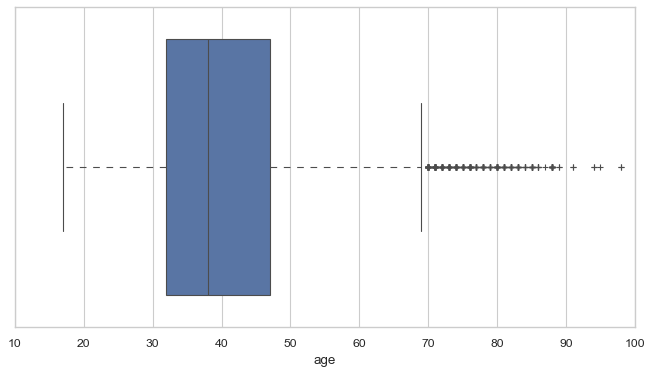

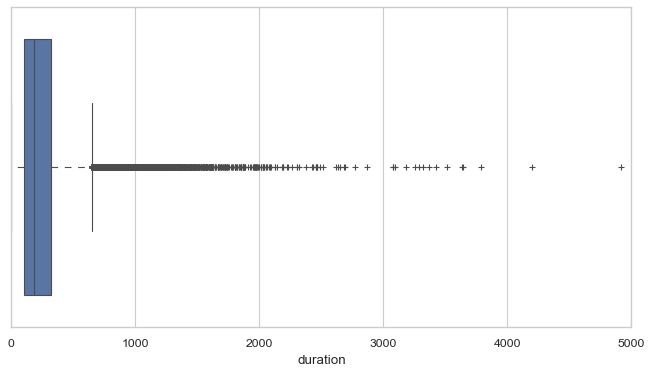

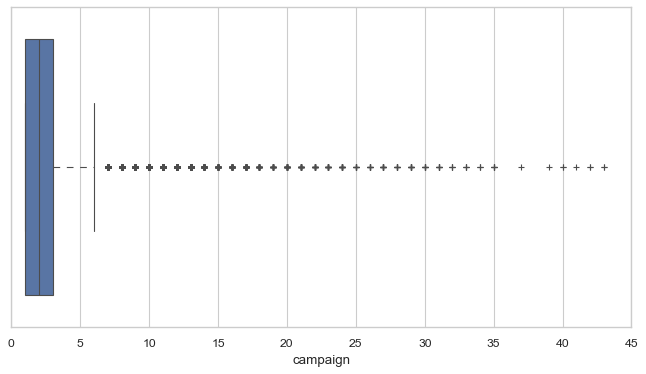

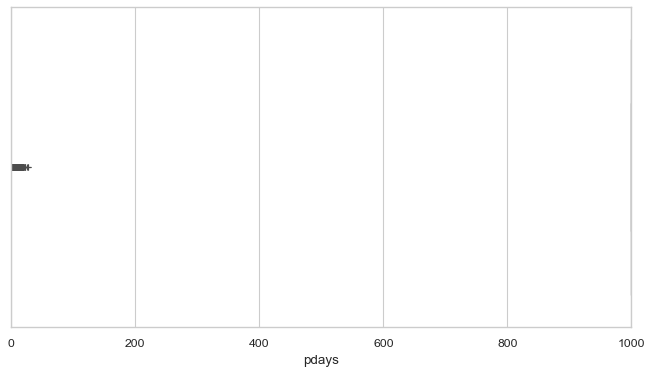

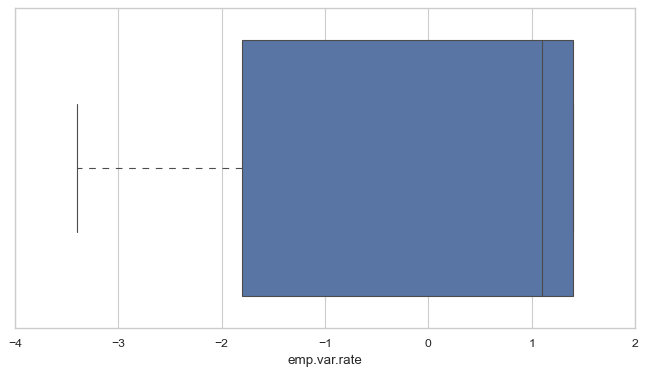

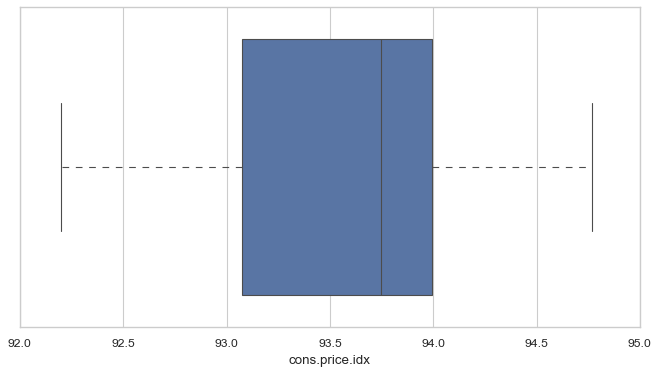

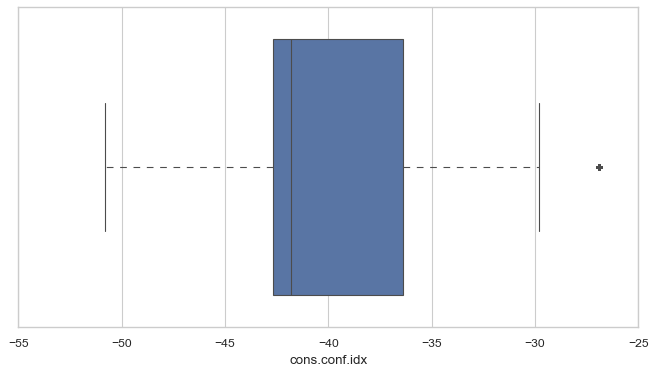

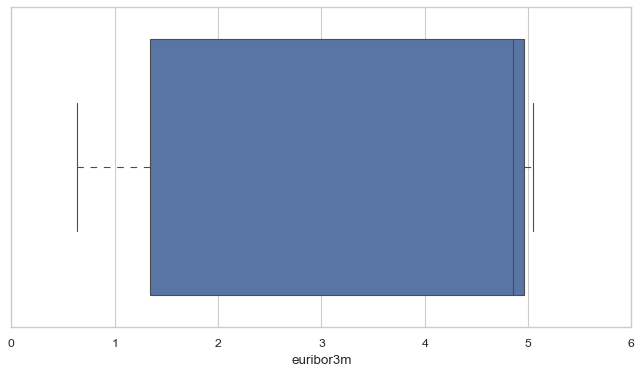

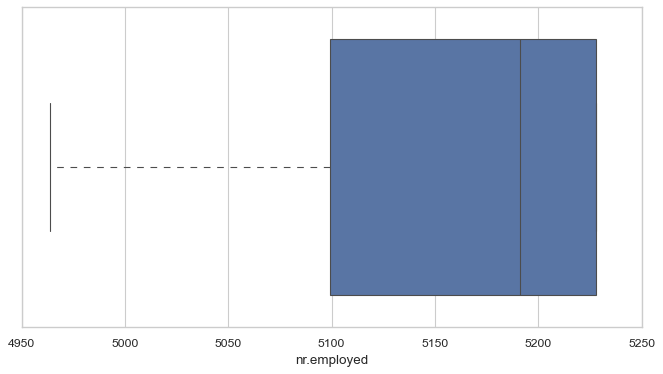

In [89]:
oulier_cols = df[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

for col in oulier_cols.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col)
    plt.xlabel(col)
    plt.show()

### Removing Outliers

- Columns 'duration', 'campaign', 'pdays', 'cons.conf.idx' have most number of outliers. Handling outliers in logistic regression is crucial to ensure accurate model estimation and predictions, as they can disproportionately influence coefficients, impact the fit of the logistic curve, and distort predicted probabilities.
- Also note that though 'age' column has some outliers we decided not to remove them. If outliers are present above the upper whisker or below the lower whisker of the box plot in a very closely clustered manner, we will fine without considering them outliers, generally.

In [90]:
oulier_cols = oulier_cols[['duration', 'campaign','pdays', 'cons.conf.idx']]

for col in oulier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    df = df[(df[col]>=LL) & (df[col]<=UL)]

df.shape

(32961, 21)

### Encoding Object Columns

In [91]:
le = LabelEncoder()

for col in df.columns:
    
    if df[col].dtype=='object':
        df[col] = le.fit_transform(df[col])

In [92]:
X = df.iloc[:,:-1]
y = df['y']

X_original = X.copy()

### Examine Correlation

In [93]:
X.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.005315,-0.384817,-0.139969,0.002365,-0.001802,-0.007890,0.013837,-0.036715,-0.023411,0.007633,0.005062,NaN,-0.000152,0.002655,0.023769,0.017784,0.114310,0.032818,0.008526
job,-0.005315,1.000000,0.019469,0.148837,0.015407,0.007832,-0.014832,-0.026111,-0.043331,-0.000658,-0.010707,-0.010499,NaN,0.002945,-0.003488,0.001878,-0.018205,0.043777,0.003549,-0.001069
marital,-0.384817,0.019469,1.000000,0.117037,-0.002571,0.012522,0.004721,-0.056407,-0.014504,0.006662,0.002266,-0.008029,NaN,0.020245,-0.015989,-0.076259,-0.060405,-0.043250,-0.082995,-0.075644
education,-0.139969,0.148837,0.117037,1.000000,0.003413,0.016875,0.009379,-0.115695,-0.089616,-0.018284,-0.024946,0.001129,NaN,0.010222,-0.006484,-0.038268,-0.099949,0.073978,-0.027534,-0.024886
default,0.002365,0.015407,-0.002571,0.003413,1.000000,-0.003905,-0.004089,-0.007356,-0.005024,0.006799,-0.006935,-0.005347,NaN,0.005537,-0.006971,0.004685,-0.003708,0.005805,0.005574,0.006479
housing,-0.001802,0.007832,0.012522,0.016875,-0.003905,1.000000,0.046012,-0.084119,-0.019438,0.002184,-0.013393,-0.007353,NaN,0.024136,-0.023660,-0.061961,-0.082896,-0.038383,-0.061282,-0.049258
loan,-0.007890,-0.014832,0.004721,0.009379,-0.004089,0.046012,1.000000,-0.009622,-0.002886,-0.011827,-0.010560,0.013652,NaN,-0.001995,-0.001769,0.000466,-0.005420,-0.009832,-0.001267,0.002903
contact,0.013837,-0.026111,-0.056407,-0.115695,-0.007356,-0.084119,-0.009622,1.000000,0.304346,-0.007334,-0.022688,0.041074,NaN,-0.201563,0.215311,0.387209,0.618858,0.313884,0.389699,0.245868
month,-0.036715,-0.043331,-0.014504,-0.089616,-0.005024,-0.019438,-0.002886,0.304346,1.000000,0.032597,0.002962,-0.034017,NaN,0.088399,-0.100368,-0.142034,0.023779,-0.043919,-0.077546,-0.179480
day_of_week,-0.023411,-0.000658,0.006662,-0.018284,0.006799,0.002184,-0.011827,-0.007334,0.032597,1.000000,0.028813,-0.049899,NaN,-0.013098,0.013708,0.037349,0.004443,0.040805,0.044562,0.037782


In [94]:
X.drop('pdays', axis=1, inplace=True)   # No correlation

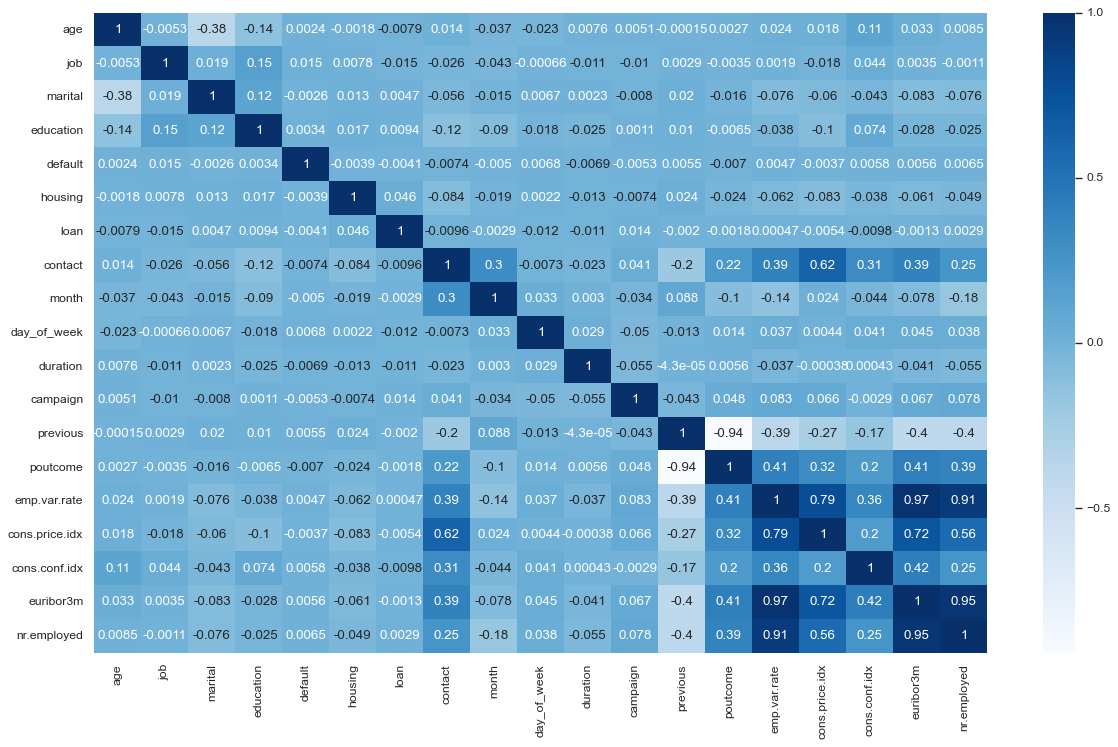

In [95]:
plt.figure(figsize=(18,10))

sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.show()

When we encounter a high positive or negative correlation between two features during bivariate correlation analysis, we consider removing one of the variables to mitigate multicollinearity and enhance model interpretability because they provide redundant or similar information. We have to choose the variable to retain based on its theoretical relevance or importance to your analysis.

In [96]:
# emp.var.rate v euribor3m (high +ve correlation of 0.97)
# emp.var.rate v nr.employed (high +ve correlation of 0.91)
# euribor3m vs nr.employed (high +ve correlation of 0.95)
# poutcome v previous (high -ve correlation of -0.94)

X.drop(columns=['emp.var.rate', 'euribor3m', 'poutcome'], axis=1, inplace=True)

### Check Multicollinearity using VIF

In [97]:
# Initialize an empty DataFrame to store the VIF values
vif_data = pd.DataFrame()

# Populate the 'feature' column with the variable names and the 'VIF' column with corresponding VIF values
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the DataFrame with VIF values
display(vif_data)


,feature,VIF
0,age,20.473104
1,job,2.091210
2,marital,5.611022
3,education,4.386768
4,default,1.000714
5,housing,2.182635
6,loan,1.187258
7,contact,2.229904
8,month,5.210651
9,day_of_week,3.091611


Automating the process of elimination of columns to finally have stable VIF values

In [98]:
while True:
    VIF_data = pd.DataFrame()
    VIF_data['feature'] = X.columns
    VIF_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    max_vif_index = VIF_data['VIF'].idxmax()

    if VIF_data['VIF'].max() > 10:
        X.drop(columns=VIF_data.loc[max_vif_index, 'feature'], inplace=True)
    else:
        break

display(VIF_data)

,feature,VIF
0,age,8.346910
1,job,2.064787
2,marital,4.108362
3,education,3.898084
4,default,1.000571
5,housing,2.131141
6,loan,1.183054
7,contact,1.887802
8,month,4.592247
9,day_of_week,2.925842


# Function to Generate model report and plot ROC curve

In [99]:
def generate_roc_curve(classifier, x_test, y_test):
    y_pred_proba = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Reference")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
     

def generate_model_report(classifier, x, y_actual):
    y_predicted = classifier.predict(x)

    # Error Metrics
    print("Accuracy = " , round(accuracy_score(y_actual, y_predicted),2))
    print("Precision = " , round(precision_score(y_actual, y_predicted),2))
    print("Recall = " , round(recall_score(y_actual, y_predicted),2))
    print("F1 Score = " , round(f1_score(y_actual, y_predicted),2))

    # Classification Report
    print("*"*30)
    print(f"Classification Report:\n{classification_report(y_actual, y_predicted)}")
    print("*"*30)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_actual, classifier.predict(x))
    plt.figure(figsize = (7, 3))
    class_names = le.classes_
    plt.title("Confusion Matrix", fontdict={"fontweight":"bold", "color":'r', "fontsize":14})
    sns.heatmap(conf_matrix, annot = True, fmt='d', cmap = "cividis", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Classes", fontdict={"fontsize":12})
    plt.ylabel("Actual Classes", fontdict={"fontsize":12})
    plt.show()

# Model Train

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

lr_classifier = LogisticRegression(max_iter=1000)

# Fitting on data
lr_classifier.fit(x_train, y_train)

# Scoring the model on train data
score_lg_train = lr_classifier.score(x_train, y_train)
print("Training score: %.2f " % score_lg_train)

# Scoring the model on test_data
score_lg_test = lr_classifier.score(x_test, y_test)
print("Testing score: %.2f " % score_lg_test)

Training score: 0.94 
Testing score: 0.94 


Accuracy =  0.94
Precision =  0.29
Recall =  0.02
F1 Score =  0.04
******************************
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9288
           1       0.29      0.02      0.04       601

    accuracy                           0.94      9889
   macro avg       0.61      0.51      0.51      9889
weighted avg       0.90      0.94      0.91      9889

******************************


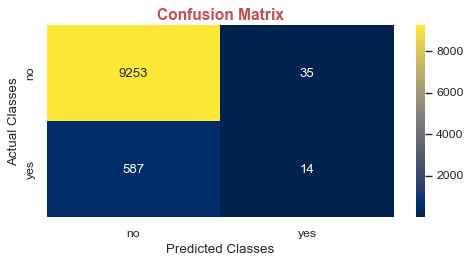

In [101]:
generate_model_report(lr_classifier, x_test, y_test)

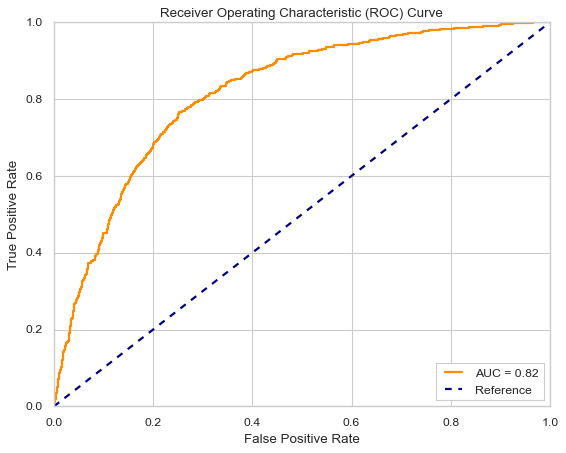

In [102]:
generate_roc_curve(lr_classifier, x_test, y_test)

# Model Performance

**Accuracy**: The model achieved a high accuracy of 94%, indicating that it correctly predicted the class labels for the majority of instances in the dataset.<br>
**Precision**: Precision is relatively low at 27%, suggesting that when the model predicts the positive class, it has a moderate probability of being correct.<br>
**Recall**: Recall is only 2%, indicating that the model has a low sensitivity to detecting the positive class instances. It misses a significant number of actual positive cases.<br>
**F1 Score**: The F1 score is 4%, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.<br>
**Area Under the Curve**: AUC is a metric for the model's ability to distinguish between positive and negative instances. A value of 0.82 suggests good discriminatory power.<br>
#### Analysis and Recommendations:

- The high accuracy may be deceptive due to the imbalanced nature of the dataset. The low recall indicates that the model struggles to identify instances of the positive class, which is crucial depending on the project's context.
Further tuning of the model, exploration of feature importance, and consideration of class imbalance techniques (e.g., oversampling, undersampling) are recommended to improve performance.
- A more comprehensive evaluation, including confusion matrices and ROC curves, could provide deeper insights into the model's strengths and weaknesses.

# Logistic Regression model using Lasso-selected features

In [103]:
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=0, shuffle=True)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and fit the Lasso model
lasso = LassoCV()
lasso.fit(x_train_scaled, y_train)

# Get the selected features
selected_features = x_train.columns[lasso.coef_ != 0]

# Use only the selected features for logistic regression
x_train_lasso = x_train[selected_features]
x_test_lasso = x_test[selected_features]

# Fit logistic regression on the selected features
lr_classifier.fit(x_train_lasso, y_train)

LogisticRegression(max_iter=1000)

Accuracy =  0.94
Precision =  0.54
Recall =  0.22
F1 Score =  0.31
******************************
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9288
           1       0.54      0.22      0.31       601

    accuracy                           0.94      9889
   macro avg       0.74      0.60      0.64      9889
weighted avg       0.93      0.94      0.93      9889

******************************


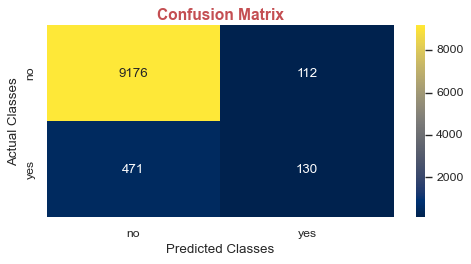

In [104]:
generate_model_report(lr_classifier, x_test_lasso, y_test)

**Analysis:**<br>
- The model with Lasso feature selection shows an improvement in precision and recall compared to the VIF-selected features.
- Lasso has identified a subset of features that contribute more effectively to the model's predictive performance.
- The F1 Score, which balances precision and recall, is higher with Lasso, indicating a better overall trade-off between false positives and false negatives.<br>

**Conclusion:**<br>
Lasso regularization appears to enhance the model's ability to discriminate between positive and negative instances, leading to a more balanced performance in terms of precision and recall.